In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import warnings
from math import pi
warnings.filterwarnings('ignore')

In [ ]:
# Mengatur gaya plot untuk tampilan yang lebih baik
plt.style.use('seaborn-v0_8-whitegrid')

# Mengatur format tampilan data pandas
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', 1000)        # Lebar tampilan
pd.set_option('display.float_format', '{:.2f}'.format)  # Format angka desimal

## Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analyst Screenesia/Impact_of_Remote_Work_on_Mental_Health.csv')

## Data Exploration

In [ ]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [ ]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,40.99,17.81,39.61,7.56,2.98,2.99,3.01
std,11.30,10.02,11.86,4.64,1.41,1.39,1.40
min,22.00,1.00,20.00,0.00,1.00,1.00,1.00
25%,31.00,9.00,29.00,4.00,2.00,2.00,2.00
50%,41.00,18.00,40.00,8.00,3.00,3.00,3.00
75%,51.00,26.00,50.00,12.00,4.00,4.00,4.00
max,60.00,35.00,60.00,15.00,5.00,5.00,5.00


In [ ]:
df.describe(include = object)

,Employee_ID,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
count,5000,5000,5000,5000,5000,5000,3804,5000,5000,5000,3371,5000,5000
unique,5000,4,7,7,3,3,3,2,3,3,2,3,6
top,EMP5000,Female,Project Manager,Finance,Remote,High,Burnout,No,Decrease,Unsatisfied,Weekly,Good,Oceania
freq,1,1274,738,747,1714,1686,1280,2553,1737,1677,1755,1687,867


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicate_count}")


Jumlah baris duplikat: 0


## Data Cleaning

In [ ]:
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")
else:
    print("Tidak ada baris duplikat.")

Tidak ada baris duplikat.


In [ ]:
# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'Employee_ID' Has 0 missing values (0.00%)
Column 'Age' Has 0 missing values (0.00%)
Column 'Gender' Has 0 missing values (0.00%)
Column 'Job_Role' Has 0 missing values (0.00%)
Column 'Industry' Has 0 missing values (0.00%)
Column 'Years_of_Experience' Has 0 missing values (0.00%)
Column 'Work_Location' Has 0 missing values (0.00%)
Column 'Hours_Worked_Per_Week' Has 0 missing values (0.00%)
Column 'Number_of_Virtual_Meetings' Has 0 missing values (0.00%)
Column 'Work_Life_Balance_Rating' Has 0 missing values (0.00%)
Column 'Stress_Level' Has 0 missing values (0.00%)
Column 'Mental_Health_Condition' Has 1196 missing values (23.92%)
Column 'Access_to_Mental_Health_Resources' Has 0 missing values (0.00%)
Column 'Productivity_Change' Has 0 missing values (0.00%)
Column 'Social_Isolation_Rating' Has 0 missing values (0.00%)
Column 'Satisfaction_with_Remote_Work' Has 0 missing values (0.00%)
Column 'Company_Support_for_Remote_Work' Has 0 missing values (0.00%)
Column 'Physical_Activit

In [ ]:
# Handle Missing Vakue (jika ada)
if df.isnull().sum().sum() > 0:
    print("\nMenangani nilai yang hilang...")

    # Untuk kolom numerik, isi dengan nilai median
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
            print(f"Mengisi nilai yang hilang pada kolom '{col}' dengan nilai median: {median_value:.2f}")

    # Untuk kolom kategorikal, isi dengan nilai yang paling sering muncul (mode)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)
            print(f"Mengisi nilai yang hilang pada kolom '{col}' dengan nilai mode: {mode_value}")
else:
    print("\nTidak ada nilai yang hilang pada dataset.")


Menangani nilai yang hilang...
Mengisi nilai yang hilang pada kolom 'Mental_Health_Condition' dengan nilai mode: Burnout
Mengisi nilai yang hilang pada kolom 'Physical_Activity' dengan nilai mode: Weekly


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [ ]:
for col in numeric_cols:
    # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

    # Menampilkan hasil
    if outliers > 0:
        print(f"- {col}: {outliers} outlier (nilai < {lower_bound:.2f} atau > {upper_bound:.2f})")
    else:
        print(f"- {col}: Tidak ada outlier")

    # Catatan: Dalam analisis data sederhana, kita hanya mengidentifikasi outlier,
    # tanpa menghapus atau mengubahnya karena bisa jadi itu adalah data yang valid.

- Age: Tidak ada outlier
- Years_of_Experience: Tidak ada outlier
- Hours_Worked_Per_Week: Tidak ada outlier
- Number_of_Virtual_Meetings: Tidak ada outlier
- Work_Life_Balance_Rating: Tidak ada outlier
- Social_Isolation_Rating: Tidak ada outlier
- Company_Support_for_Remote_Work: Tidak ada outlier


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['Age',
 'Years_of_Experience',
 'Hours_Worked_Per_Week',
 'Number_of_Virtual_Meetings',
 'Work_Life_Balance_Rating',
 'Social_Isolation_Rating',
 'Company_Support_for_Remote_Work']

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Employee_ID',
 'Gender',
 'Job_Role',
 'Industry',
 'Work_Location',
 'Stress_Level',
 'Mental_Health_Condition',
 'Access_to_Mental_Health_Resources',
 'Productivity_Change',
 'Satisfaction_with_Remote_Work',
 'Physical_Activity',
 'Sleep_Quality',
 'Region']

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Analyst Screenesia/Impact_of_Remote_Work_on_Mental_Health_Clean.csv', index=False)

## Explortory Data Analysis (EDA)

In [ ]:
# Statistik Dasar per Variabel
print("\nStatistik penting:")
for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"\n{col}:")
    print(f"  - Rata-rata: {mean_val:.2f}")
    print(f"  - Median: {median_val:.2f}")
    print(f"  - Minimum: {min_val:.2f}")
    print(f"  - Maximum: {max_val:.2f}")


Statistik penting:

Age:
  - Rata-rata: 40.99
  - Median: 41.00
  - Minimum: 22.00
  - Maximum: 60.00

Years_of_Experience:
  - Rata-rata: 17.81
  - Median: 18.00
  - Minimum: 1.00
  - Maximum: 35.00

Hours_Worked_Per_Week:
  - Rata-rata: 39.61
  - Median: 40.00
  - Minimum: 20.00
  - Maximum: 60.00

Number_of_Virtual_Meetings:
  - Rata-rata: 7.56
  - Median: 8.00
  - Minimum: 0.00
  - Maximum: 15.00

Work_Life_Balance_Rating:
  - Rata-rata: 2.98
  - Median: 3.00
  - Minimum: 1.00
  - Maximum: 5.00

Social_Isolation_Rating:
  - Rata-rata: 2.99
  - Median: 3.00
  - Minimum: 1.00
  - Maximum: 5.00

Company_Support_for_Remote_Work:
  - Rata-rata: 3.01
  - Median: 3.00
  - Minimum: 1.00
  - Maximum: 5.00


## 1. Bagaimana lokasi kerja mempengaruhi tingkat stres?

In [ ]:
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level_Num'] = df['Stress_Level'].map(stress_map)

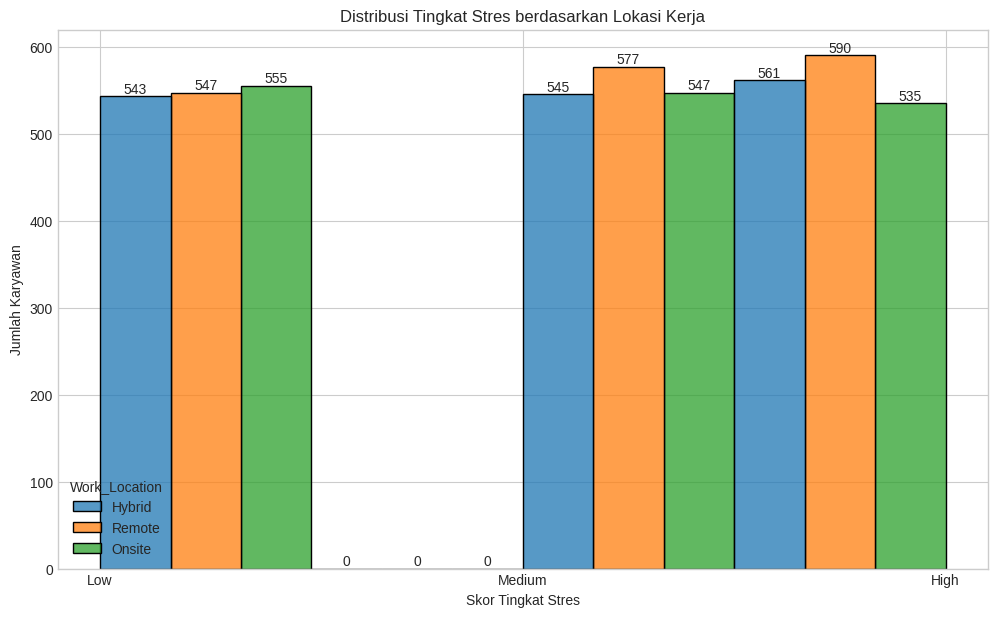

In [ ]:
plt.figure(figsize=(12, 7))
for container in sns.histplot(data=df, x='Stress_Level_Num', hue='Work_Location', multiple='dodge', binwidth=0.5).containers:
    plt.bar_label(container)

plt.title('Distribusi Tingkat Stres berdasarkan Lokasi Kerja')
plt.xlabel('Skor Tingkat Stres')
plt.ylabel('Jumlah Karyawan')
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.show()

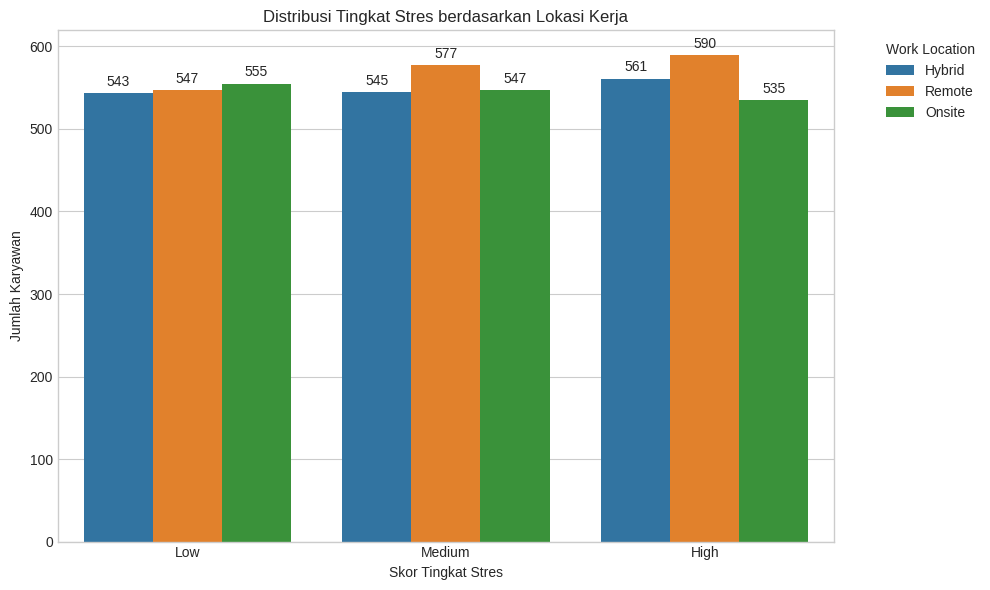

In [ ]:
stress_order = ['Low', 'Medium', 'High']

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Stress_Level', hue='Work_Location', order=stress_order)

# Tambahkan label di atas bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Judul dan label
plt.title('Distribusi Tingkat Stres berdasarkan Lokasi Kerja')
plt.xlabel('Skor Tingkat Stres')
plt.ylabel('Jumlah Karyawan')

# Pindahkan legenda ke kanan luar
plt.legend(title='Work Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hapus angka "0 0 0" dengan memastikan x hanya label kategori
plt.xticks(ticks=range(len(stress_order)), labels=stress_order)

plt.tight_layout()
plt.show()

## 2. Derajat isolasi sosial mana yang lebih besar pada tiap lokasi kerja?

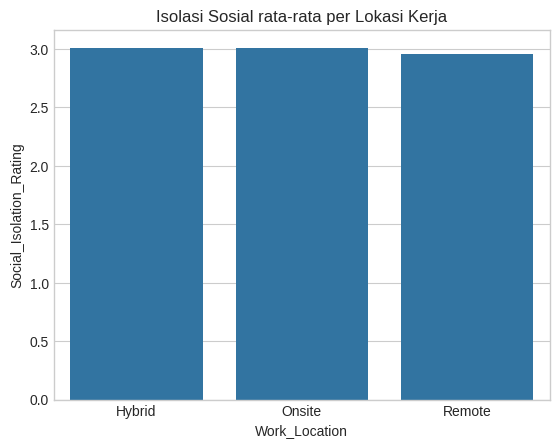

In [ ]:
isolation_mean = df.groupby('Work_Location')['Social_Isolation_Rating'].mean().reset_index()
sns.barplot(x='Work_Location', y='Social_Isolation_Rating', data=isolation_mean)
plt.title('Isolasi Sosial rata-rata per Lokasi Kerja')
plt.show()

## 3. Bagaimana tingkat kepuasan karyawan terhadap sistem kerja jarak jauh?

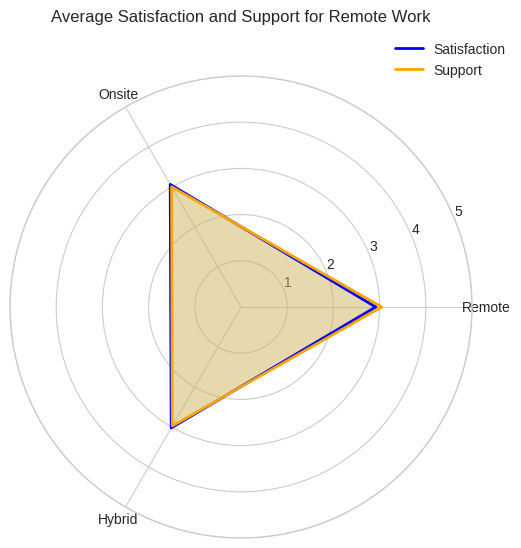

In [ ]:
# Konversi Satisfaction ke angka (1,3,5)
satisfaction_mapping = {'Unsatisfied': 1, 'Neutral': 3, 'Satisfied': 5}
df['Satisfaction_with_Remote_Work_Num'] = df['Satisfaction_with_Remote_Work'].map(satisfaction_mapping)

# Hitung rata-rata kepuasan per lokasi kerja
satisfaction_mean = df.groupby('Work_Location')['Satisfaction_with_Remote_Work_Num'].mean()
support_mean = df.groupby('Work_Location')['Company_Support_for_Remote_Work'].mean()

# Siapkan label dan nilai
labels = ['Remote', 'Onsite', 'Hybrid']  # Sesuai urutan di Power BI
satisfaction_values = [satisfaction_mean[label] for label in labels]
support_values = [support_mean[label] for label in labels]

# Tambahkan titik pertama ke akhir
satisfaction_values += [satisfaction_values[0]]
support_values += [support_values[0]]

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += [angles[0]]

# Buat plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Plot Satisfaction
ax.plot(angles, satisfaction_values, label='Satisfaction', color='blue', linewidth=2)
ax.fill(angles, satisfaction_values, color='skyblue', alpha=0.3)

# Plot Support
ax.plot(angles, support_values, label='Support', color='orange', linewidth=2)
ax.fill(angles, support_values, color='orange', alpha=0.3)

# Label dan judul
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Average Satisfaction and Support for Remote Work', y=1.1)
ax.set_ylim(0, 5)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## 4. Seberapa besar dukungan perusahaan terhadap program kerja jarak jauh?

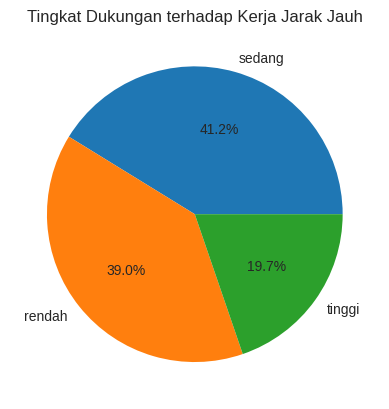

In [ ]:
df['Support_Level'] = pd.cut(df['Company_Support_for_Remote_Work'], bins=[-1,2,4,5], labels=['rendah','sedang','tinggi'])
df['Support_Level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Tingkat Dukungan terhadap Kerja Jarak Jauh')
plt.ylabel('')
plt.show()

## 5. Bagaimana hubungan antara aktivitas fisik dan kualitas tidur dengan kondisi mental?

In [ ]:
# Mapping kategori ke angka
mental_map = {
    'None': 0,
    'Anxiety': 1,
    'Depression': 2,
    'Burnout': 3
}

activity_map = {
    'None': 0,
    'Weekly': 1,
    'Daily': 2
}

sleep_map = {
    'Poor': 1,
    'Average': 2,
    'Good': 3
}

# Terapkan mapping ke dataframe
df['Mental_Health_Condition_Num'] = df['Mental_Health_Condition'].map(mental_map)
df['Physical_Activity_Num'] = df['Physical_Activity'].map(activity_map)
df['Sleep_Quality_Num'] = df['Sleep_Quality'].map(sleep_map)


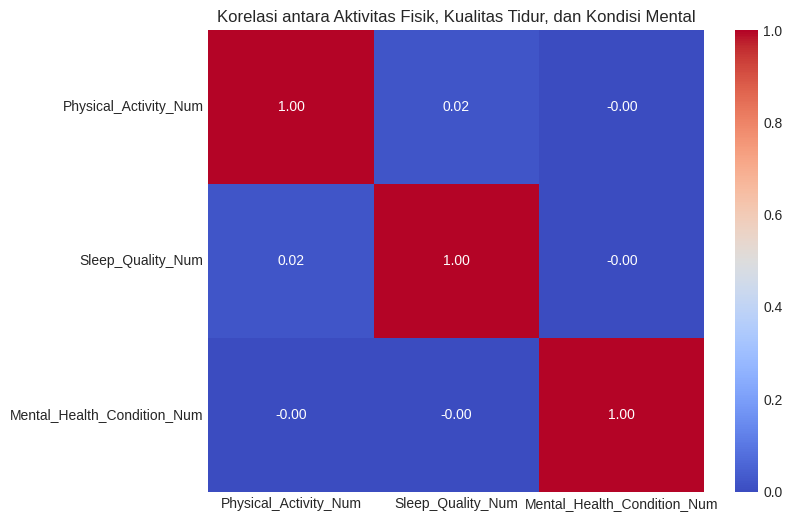

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil kolom yang sudah dikonversi
korelasi_df = df[['Physical_Activity_Num', 'Sleep_Quality_Num', 'Mental_Health_Condition_Num']]

# Hitung korelasi
corr_matrix = korelasi_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Aktivitas Fisik, Kualitas Tidur, dan Kondisi Mental")
plt.show()